In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [5]:
#read_data 
historical_data=pd.read_csv("historical_data.csv")
historical_data.head()


,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0


In [6]:
historical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     196441 non-null  float64
 1   created_at                                    197428 non-null  object 
 2   actual_delivery_time                          197421 non-null  object 
 3   store_id                                      197428 non-null  int64  
 4   store_primary_category                        192668 non-null  object 
 5   order_protocol                                196433 non-null  float64
 6   total_items                                   197428 non-null  int64  
 7   subtotal                                      197428 non-null  int64  
 8   num_distinct_items                            197428 non-null  int64  
 9   min_item_price                                19

In [7]:
historical_data["created_at"]=pd.to_datetime(historical_data['created_at'])
historical_data["actual_delivery_time"]=pd.to_datetime(historical_data['actual_delivery_time'])

In [8]:
from datetime import datetime
historical_data["actual_total_delivery_duration"]=(historical_data["actual_delivery_time"]-historical_data["created_at"])

In [9]:
historical_data["busy_dashers_ratio"]=historical_data["total_busy_dashers"]/ historical_data['total_onshift_dashers']


In [10]:
historical_data["non_prep_duration"]=historical_data["estimated_store_to_consumer_driving_duration"]+historical_data["estimated_order_place_duration"]

In [11]:
historical_data["market_id"].nunique()

6

In [12]:
historical_data["store_id"].nunique()

6743

In [13]:
historical_data["order_protocol"].nunique()

7

In [14]:
order_protocol_dummies=pd.get_dummies(historical_data.order_protocol)
order_protocol_dummies=order_protocol_dummies.add_prefix("order_protocol")

In [15]:
order_protocol_dummies.head()

,order_protocol1.0,order_protocol2.0,order_protocol3.0,order_protocol4.0,order_protocol5.0,order_protocol6.0,order_protocol7.0
0,True,False,False,False,False,False,False
1,False,True,False,False,False,False,False
2,True,False,False,False,False,False,False
3,True,False,False,False,False,False,False
4,True,False,False,False,False,False,False


In [16]:
market_id_dummies=pd.get_dummies(historical_data.market_id)
market_id_dummies=market_id_dummies.add_prefix("market_id_")
market_id_dummies.head()

,market_id_1.0,market_id_2.0,market_id_3.0,market_id_4.0,market_id_5.0,market_id_6.0
0,True,False,False,False,False,False
1,False,True,False,False,False,False
2,False,False,True,False,False,False
3,False,False,True,False,False,False
4,False,False,True,False,False,False


In [17]:
#create dictionary with most repeated categories of each store to fill null rows where it is possible
store_id_unique=historical_data["store_id"].unique().tolist()
store_id_and_category={store_id:historical_data[historical_data.store_id==store_id].store_primary_category.mode()
                      for store_id in store_id_unique}

In [18]:
def fill(store_id):
    try:
        return store_id_and_category[store_id].values[0]
    except:
        return np.nan
    
#fill null values
historical_data["nan_free_store_primary_category"]=historical_data.store_id.apply(fill)

In [19]:
store_primary_category_dummies=pd.get_dummies(historical_data.nan_free_store_primary_category)
store_primary_category_dummies=store_primary_category_dummies.add_prefix('category_')
store_primary_category_dummies.head()

,category_afghan,category_african,category_alcohol,category_alcohol-plus-food,category_american,category_argentine,category_asian,category_barbecue,category_belgian,category_brazilian,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [20]:
#drop 
train_df=historical_data.drop(columns=["created_at","market_id","store_id","store_primary_category","actual_delivery_time","nan_free_store_primary_category","actual_total_delivery_duration"]
                             )
train_df.head()

,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,busy_dashers_ratio,non_prep_duration
0,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,0.424242,1307.0
1,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,2.000000,1136.0
2,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,0.000000,1136.0
3,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,1.000000,735.0
4,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,1.000000,1096.0


In [21]:
train_df=pd.concat([train_df,order_protocol_dummies,market_id_dummies,store_primary_category_dummies],axis=1)

In [22]:
train_df=train_df.astype("float32")
train_df.head()

,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
0,1.0,4.0,3441.0,4.0,557.0,1239.0,33.0,14.0,21.0,446.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,1.0,1900.0,1.0,1400.0,1400.0,1.0,2.0,2.0,446.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1900.0,1.0,1900.0,1900.0,1.0,0.0,0.0,446.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,6.0,6900.0,5.0,600.0,1800.0,1.0,1.0,2.0,446.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,3.0,3900.0,3.0,1100.0,1600.0,6.0,6.0,9.0,446.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
train_df.describe()

,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
count,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000,197428.000000,...,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000
mean,2.882352,3.196391,2682.331543,2.670791,686.218506,1159.588623,44.808094,41.739746,58.050064,308.560181,...,0.000815,0.000187,0.005465,0.011300,0.000740,0.037254,0.001175,0.001433,0.004234,0.030928
std,1.503763,2.665833,1822.968994,1.629398,522.068542,558.358337,34.524193,32.146065,52.657368,90.211159,...,0.028535,0.013687,0.073625,0.105705,0.027175,0.189502,0.034246,0.037816,0.064904,0.173167
min,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000,251.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000,251.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000,446.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2715.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
train_df["busy_dashers_ratio"].describe()

count    1.775900e+05
mean              NaN
std               NaN
min              -inf
25%      8.269231e-01
50%      9.622642e-01
75%      1.000000e+00
max               inf
Name: busy_dashers_ratio, dtype: float64

In [25]:
#check infinity values
np.where(np.any(~np.isfinite(train_df),axis=0)==True)

(array([ 0,  6,  7,  8, 10, 11, 12], dtype=int64),)

In [26]:
#replace inf with nan to drop all nans
train_df.replace([np.inf,-np.inf],np.nan,inplace=True)
#drop all nans
train_df.dropna(inplace=True)

In [27]:
train_df.shape

(176173, 100)

In [28]:
corr=train_df.corr()
mask=np.triu(np.ones_like(corr,dtype=bool))


<Axes: >

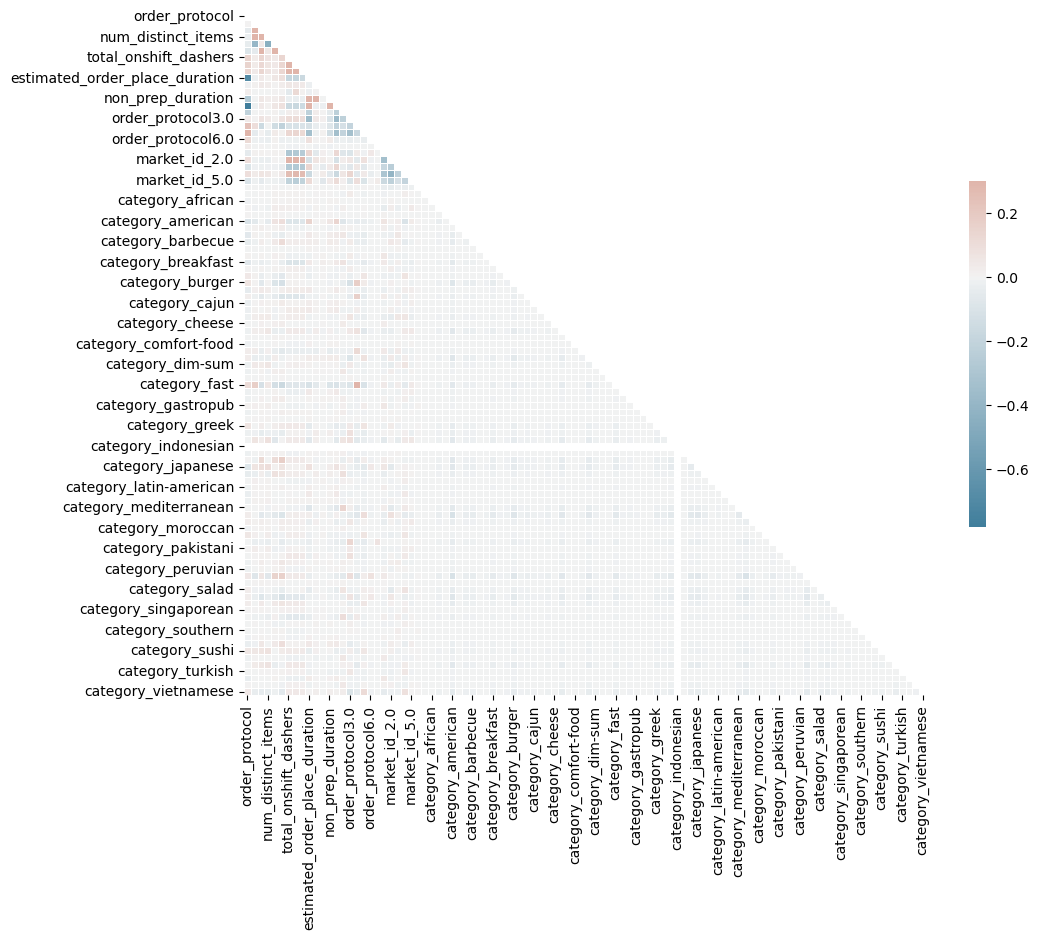

In [30]:
f,ax= plt.subplots(figsize=(11,9))
cmap=sns.diverging_palette(230,20,as_cmap=True)
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=.3,center=0,square=True,linewidths=.5,cbar_kws={"shrink":.5})

In [31]:
train_df['category_indonesian'].describe()

count    176173.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: category_indonesian, dtype: float64

In [32]:
def get_redundant_pairs(df):
    pairs_to_drop=set()
    cols=df.columns
    for i in range(0,df.shape[1]):
        for j in range(0,i+1):
            pairs_to_drop.add((cols[i],cols[j]))
    return pairs_to_drop

In [33]:
def get_top_abs_correlations(df,n=5):
    au_corr=df.corr().abs().unstack()
    labels_to_drop=get_redundant_pairs(df)
    au_corr=au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]


In [34]:
print("Top absolute Correlations")
print(get_top_abs_correlations(train_df,20))


Top absolute Correlations
total_onshift_dashers                         total_busy_dashers                0.941757
                                              total_outstanding_orders          0.934656
total_busy_dashers                            total_outstanding_orders          0.931313
estimated_store_to_consumer_driving_duration  non_prep_duration                 0.923068
estimated_order_place_duration                order_protocol1.0                 0.900658
order_protocol                                order_protocol1.0                 0.780826
                                              order_protocol5.0                 0.768996
total_items                                   num_distinct_items                0.757864
order_protocol                                estimated_order_place_duration    0.687010
subtotal                                      num_distinct_items                0.682966
total_items                                   subtotal                          0.55

In [35]:
train_df=historical_data.drop(columns=["created_at","market_id","store_id","store_primary_category","actual_delivery_time","nan_free_store_primary_category","order_protocol"])

In [41]:
train_df=pd.concat([train_df,order_protocol_dummies,store_primary_category_dummies],axis=1)

train_df=train_df.drop(columns=["total_onshift_dashers","total_busy_dashers","category_indonesian","estimated_non_prep_duration"])

train_df=train_df.astype("float32")
train_df.replace([np.inf,-np.inf],np.nan,inplace=True)
train_df.dropna(inplace=True)

train_df.head()

KeyError: "['total_onshift_dashers' 'total_busy_dashers' 'category_indonesian'\n 'estimated_non_prep_duration'] not found in axis"

TypeError: Cannot cast TimedeltaArray to dtype float32